# Heart Diseases Prediction - ML Project
#### **Roll No.**

*CS21092*

*CS21083*

*CS21077*

In [1]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,MinMaxScaler,FunctionTransformer,RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score



import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')


## Get the data

In [2]:
pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

"""
From the repository

The "goal" field refers to the presence of heart disease in the patient.
It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland
database have concentrated on simply attempting to distinguish
presence (values 1,2,3,4) from absence (value 0).
"""

print("Y \n", y.head())

# making y binary where 0 means absence and 1 means presence
y_processed = pd.DataFrame(np.where(y == 0, 0, 1), columns=['num'])
print("Processed Y",y_processed.head())




Y 
    num
0    0
1    2
2    1
3    0
4    0
Processed Y    num
0    0
1    1
2    1
3    0
4    0


In [4]:
df = pd.concat([X, y_processed], axis=1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


## Feature Engineering
*Step 1* - **Exploratory Data Analysis**

*Step 2* - **Handle Outliers**

*Step 3* - **Handle Missing Values**

*Step 4* - **Feature Scaling**

*Step 5* - **Feature Transformation**

*Step 6* - **Set up the Feature Engineering Pipelines**

In [5]:
# splitting into train and test sets to avoid Data Leakage
X = df.drop('num', axis=1)
y = df['num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [6]:
numeric_feat = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_feat = ['sex', 'restecg', 'thal', 'slope', 'cp', 'exang', 'ca','fbs']

### Feature Engineering Pipelines


**Steps to perform**


1.   Impute missing values
2.   Scale features



In [7]:
# Categorical Features PipeLines
categorical__feat_pipeline = Pipeline(
    steps = [
        ("knn_imputer", KNNImputer(n_neighbors=1))
    ]
)


# Numeric Features PipeLines
numeric_feat_pipeline = Pipeline(
    steps = [
    ("scaler", RobustScaler())
])

In [8]:
preprocessor1 = ColumnTransformer(
    transformers = [
        ("knn_imputation", categorical__feat_pipeline, ['ca','thal']),
        ("numeric_pipeline", numeric_feat_pipeline, numeric_feat)
    ],verbose_feature_names_out = False,
    remainder = "passthrough"
)
preprocessor1

ColumnTransformer(remainder='passthrough',
                  transformers=[('knn_imputation',
                                 Pipeline(steps=[('knn_imputer',
                                                  KNNImputer(n_neighbors=1))]),
                                 ['ca', 'thal']),
                                ('numeric_pipeline',
                                 Pipeline(steps=[('scaler', RobustScaler())]),
                                 ['age', 'trestbps', 'chol', 'thalach',
                                  'oldpeak'])],
                  verbose_feature_names_out=False)

In [9]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

preprocessor = Pipeline (
    steps = [
    ("feature_eng_steps", preprocessor1),
    ("feature_selection_steps", SelectKBest(score_func=mutual_info_classif,k=10))
    ]
).set_output(transform='pandas')

## Data Modeling

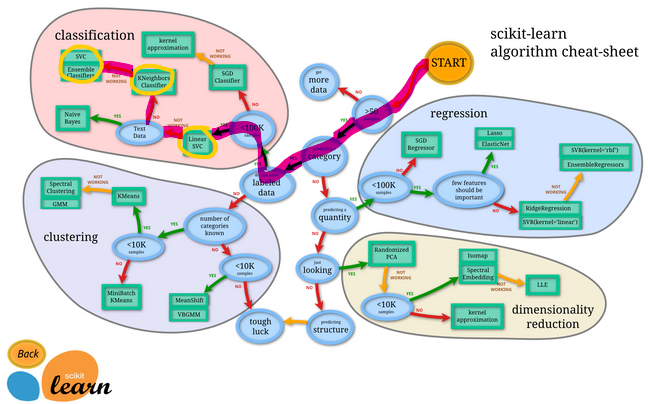

In [10]:
train_arr = preprocessor.fit_transform(X_train,y_train)
test_arr =  preprocessor.transform(X_test)

### Models to be used
* **SVM**
* **KNN**
* **LOGISTIC REGRESSION** - I have added from my side
* **DT**
* **RF**
* **GaussainNB**

In [11]:
models = {
    'SVM': SVC(random_state=42,probability=True),
    'KNN': KNeighborsClassifier(),
    'LR': LogisticRegression(random_state=42),
    'DT': DecisionTreeClassifier(random_state=42),
    'RF': RandomForestClassifier(random_state=42),
    'GaussainNB': GaussianNB()
}

model_pipeline = {}

for name, model in models.items():
  pipe = Pipeline(
      steps = [
      ('model', models[name])
      ]
)
  model_pipeline[name] = pipe


In [12]:
svm_pipeline = model_pipeline['SVM'].fit(train_arr,y_train)
svm_score = cross_val_score(svm_pipeline,test_arr,y_test,scoring='accuracy',cv=5).mean()
#svm_score = svm_pipeline.score(test_arr,y_test)


print(f"Accuracy on test set is : {svm_score:.4f}")


Accuracy on test set is : 0.8100


In [13]:
dt_pipeline = model_pipeline['DT'].fit(train_arr,y_train)
dt_score = cross_val_score(dt_pipeline,test_arr,y_test,scoring='accuracy',cv=5).mean()
#dt_score = dt_pipeline.score(test_arr,y_test)

print(f"Accuracy on test set is : {dt_score:.4f}")


Accuracy on test set is : 0.6700


In [14]:
knn_pipeline = model_pipeline['KNN'].fit(train_arr,y_train)
knn_score = cross_val_score(knn_pipeline,test_arr,y_test,scoring='accuracy',cv=5).mean()
#knn_score = knn_pipeline.score(test_arr,y_test)

print(f"Accuracy on test set is : {knn_score:.4f}")

Accuracy on test set is : 0.8100


In [15]:
rf_pipeline = model_pipeline['RF'].fit(train_arr,y_train)
rf_score = cross_val_score(rf_pipeline,test_arr,y_test,scoring='accuracy',cv=5).mean()
#rf_score = rf_pipeline.score(test_arr,y_test)

print(f"Accuracy on test set is : {rf_score:.4f}")

Accuracy on test set is : 0.8600


In [16]:
gauss_pipeline = model_pipeline['GaussainNB'].fit(train_arr,y_train)
gauss_score = cross_val_score(gauss_pipeline,test_arr,y_test,scoring='accuracy',cv=5).mean()
#gauss_score = gauss_pipeline.score(test_arr,y_test)

print(f"Accuracy on test set is : {gauss_score:.4f}")

Accuracy on test set is : 0.8200


In [17]:
lr_pipeline = model_pipeline['LR'].fit(train_arr,y_train)
lr_score = cross_val_score(lr_pipeline,test_arr,y_test,scoring='accuracy',cv=5).mean()
#lr_score = lr_pipeline.score(test_arr,y_test)

print(f"Accuracy on test set is : {lr_score:.4f}")

Accuracy on test set is : 0.8600


## HT


In [18]:
svm_parameters = {
    'model__C': [0.0011, 0.005, 0.01, 0.05, 0.1, 1, 10, 20],
    'model__kernel': ['linear', 'rbf'],
    'model__gamma': ['scale', 'auto', 0.1, 0.5, 1, 5],
    'model__degree': [1,2,3]

}

# Perform GridSearchCV
grid_search = GridSearchCV(model_pipeline['SVM'], svm_parameters, cv=5 )
grid_search.fit(train_arr, y_train)
print(grid_search.best_estimator_)
grid_search.best_params_

Pipeline(steps=[('model',
                 SVC(C=10, degree=1, kernel='linear', probability=True,
                     random_state=42))])


{'model__C': 10,
 'model__degree': 1,
 'model__gamma': 'scale',
 'model__kernel': 'linear'}

In [19]:
# Define the parameters grid specific to Decision Tree
dt_parameters = {
    'model__max_depth': [None, 5, 10, 15],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__criterion': ['gini', 'entropy']
}

# Perform GridSearchCV
grid_search = GridSearchCV(model_pipeline['DT'], dt_parameters, cv=5)
grid_search.fit(train_arr, y_train)
print(grid_search.best_estimator_)
grid_search.best_params_


Pipeline(steps=[('model',
                 DecisionTreeClassifier(max_depth=5, min_samples_leaf=2,
                                        random_state=42))])


{'model__criterion': 'gini',
 'model__max_depth': 5,
 'model__min_samples_leaf': 2,
 'model__min_samples_split': 2}

In [20]:
# Define the parameters grid specific to KNN
knn_parameters = {
    'model__n_neighbors': list(range(1, 15)),
    'model__weights': ['uniform', 'distance'],
    'model__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'model__p': [1, 2]  # 1: Manhattan distance, 2: Euclidean distance
}

# Perform GridSearchCV
grid_search = GridSearchCV(model_pipeline['KNN'], knn_parameters, cv=5)
grid_search.fit(train_arr, y_train)
print(grid_search.best_estimator_)
grid_search.best_params_

Pipeline(steps=[('model', KNeighborsClassifier(n_neighbors=12, p=1))])


{'model__algorithm': 'auto',
 'model__n_neighbors': 12,
 'model__p': 1,
 'model__weights': 'uniform'}

In [21]:
rf_parameters = {
    'model__n_estimators': [10, 50, 100],
    'model__max_depth': [None, 2 , 5],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 2, 3],
    'model__criterion': ['gini']
}

grid_search = GridSearchCV(model_pipeline['RF'], rf_parameters, cv=5)
grid_search.fit(train_arr, y_train)
print(grid_search.best_estimator_)
grid_search.best_params_

Pipeline(steps=[('model',
                 RandomForestClassifier(min_samples_split=5, random_state=42))])


{'model__criterion': 'gini',
 'model__max_depth': None,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 5,
 'model__n_estimators': 100}

In [22]:
# Define the parameters grid specific to Multinomial Naive Bayes
nb_parameters = {
    'model__var_smoothing': [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
}

# Perform GridSearchCV
grid_search = GridSearchCV(model_pipeline['GaussainNB'], nb_parameters, cv=5)
grid_search.fit(train_arr, y_train)
print(grid_search.best_estimator_)
grid_search.best_params_

Pipeline(steps=[('model', GaussianNB(var_smoothing=1e-07))])


{'model__var_smoothing': 1e-07}

In [23]:
lr_parameters = {
    'model__penalty': ['l1', 'l2','elasticnet',None],
    'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'model__max_iter': [100, 200, 300, 400, 500],
}

# Perform GridSearchCV
grid_search = GridSearchCV(model_pipeline['LR'], lr_parameters, cv=5)
grid_search.fit(train_arr, y_train)
print(grid_search.best_estimator_)
grid_search.best_params_

Pipeline(steps=[('model', LogisticRegression(C=1, random_state=42))])


{'model__C': 1, 'model__max_iter': 100, 'model__penalty': 'l2'}

## EVal

In [24]:
tuned_models = {
    'SVM': SVC(C=1, degree=1, probability=True, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=6, p=1),
    'LR': LogisticRegression(C=0.1, random_state=42),
    'DT': DecisionTreeClassifier(max_depth=5, min_samples_leaf=4, random_state=42),
    'RF': RandomForestClassifier(max_depth=2, min_samples_leaf=2, n_estimators=50, random_state=42),
    'GaussainNB': GaussianNB(var_smoothing=1e-07)
}

tuned_model_pipeline = {}

for name, model in tuned_models.items():
  pipe = Pipeline(
      steps = [
      ('model', tuned_models[name])
      ]
)
  tuned_model_pipeline[name] = pipe


In [25]:
tuned_svm_pipeline = tuned_model_pipeline['SVM'].fit(train_arr,y_train)
svm_score = cross_val_score(tuned_svm_pipeline,test_arr,y_test,scoring='accuracy',cv=5).mean()
#svm_score = tuned_svm_pipeline.score(test_arr,y_test)
print(f"Accuracy on test set is : {svm_score:.4f}")


Accuracy on test set is : 0.8100


In [26]:
tuned_dt_pipeline = tuned_model_pipeline['DT'].fit(train_arr,y_train)
dt_score = cross_val_score(tuned_dt_pipeline,test_arr,y_test,scoring='accuracy',cv=5).mean()
#dt_score = tuned_dt_pipeline.score(test_arr,y_test)

print(f"Accuracy on test set is : {dt_score:.4f}")


Accuracy on test set is : 0.7500


In [27]:
tuned_knn_pipeline = tuned_model_pipeline['KNN'].fit(train_arr,y_train)
knn_score = cross_val_score(tuned_knn_pipeline,test_arr,y_test,scoring='accuracy',cv=5).mean()
#knn_score = tuned_knn_pipeline.score(test_arr,y_test)

print(f"Accuracy on test set is : {knn_score:.4f}")

Accuracy on test set is : 0.8100


In [28]:
tuned_rf_pipeline = tuned_model_pipeline['RF'].fit(train_arr,y_train)
rf_score = cross_val_score(tuned_rf_pipeline,test_arr,y_test,scoring='accuracy',cv=5).mean()
#rf_score = tuned_rf_pipeline.score(test_arr,y_test)

print(f"Accuracy on test set is : {rf_score:.4f}")

Accuracy on test set is : 0.8000


In [29]:
tuned_gauss_pipeline = tuned_model_pipeline['GaussainNB'].fit(train_arr,y_train)
gauss_score = cross_val_score(tuned_gauss_pipeline,test_arr,y_test,scoring='accuracy',cv=5).mean()
#gauss_score = tuned_gauss_pipeline.score(test_arr,y_test)

print(f"Accuracy on test set is : {gauss_score:.4f}")

Accuracy on test set is : 0.8200


In [30]:
tuned_lr_pipeline = tuned_model_pipeline['LR'].fit(train_arr,y_train)
lr_score = cross_val_score(tuned_lr_pipeline,test_arr,y_test,scoring='accuracy',cv=5).mean()
#lr_score = tuned_lr_pipeline.score(test_arr,y_test)

print(f"Accuracy on test set is : {lr_score:.4f}")

Accuracy on test set is : 0.8100


## Testing

Training SVM...
SVM - Test Accuracy: 0.8100
SVM - Test Precision: 0.7965656565656566
SVM - Test Recall: 0.8155555555555555
SVM - Test F1-score: 0.8093703956861852
SVM - Test AUC-ROC: 0.9120
SVM - Test Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.82      0.86        51
           1       0.83      0.90      0.86        49

    accuracy                           0.86       100
   macro avg       0.86      0.86      0.86       100
weighted avg       0.86      0.86      0.86       100




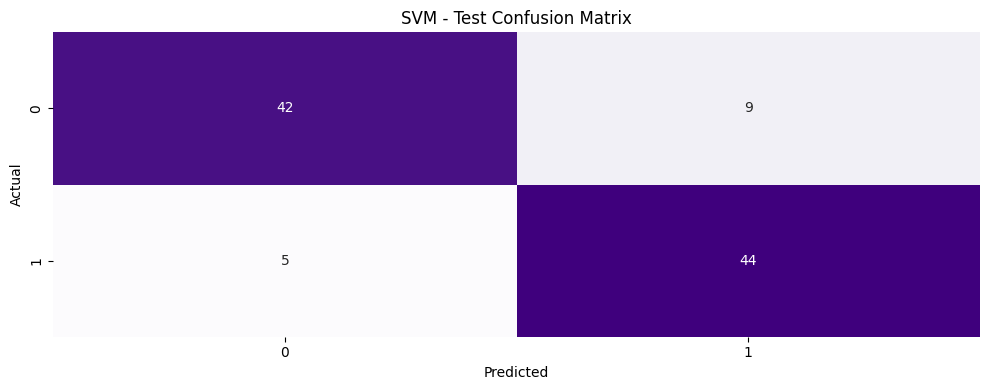

Training KNN...
KNN - Test Accuracy: 0.8100
KNN - Test Precision: 0.8600649350649352
KNN - Test Recall: 0.7355555555555556
KNN - Test F1-score: 0.8072752989969304
KNN - Test AUC-ROC: 0.8922
KNN - Test Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84        51
           1       0.86      0.78      0.82        49

    accuracy                           0.83       100
   macro avg       0.83      0.83      0.83       100
weighted avg       0.83      0.83      0.83       100




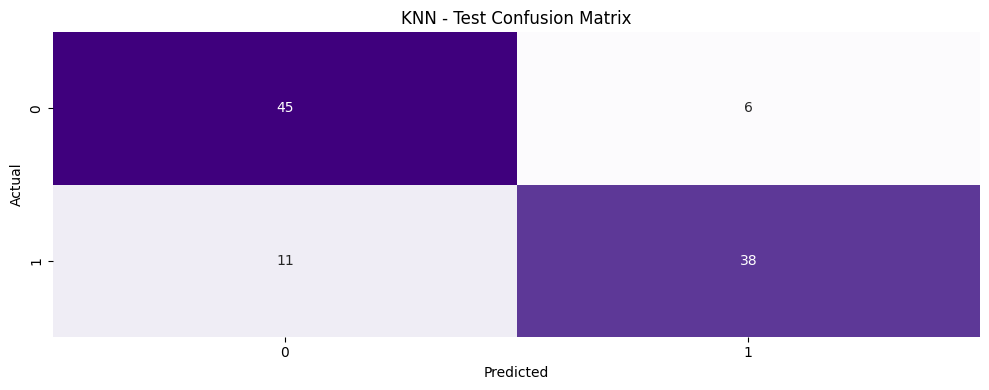

Training LR...
LR - Test Accuracy: 0.8100
LR - Test Precision: 0.7954545454545455
LR - Test Recall: 0.8133333333333332
LR - Test F1-score: 0.8087488542327688
LR - Test AUC-ROC: 0.9112
LR - Test Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85        51
           1       0.84      0.86      0.85        49

    accuracy                           0.85       100
   macro avg       0.85      0.85      0.85       100
weighted avg       0.85      0.85      0.85       100




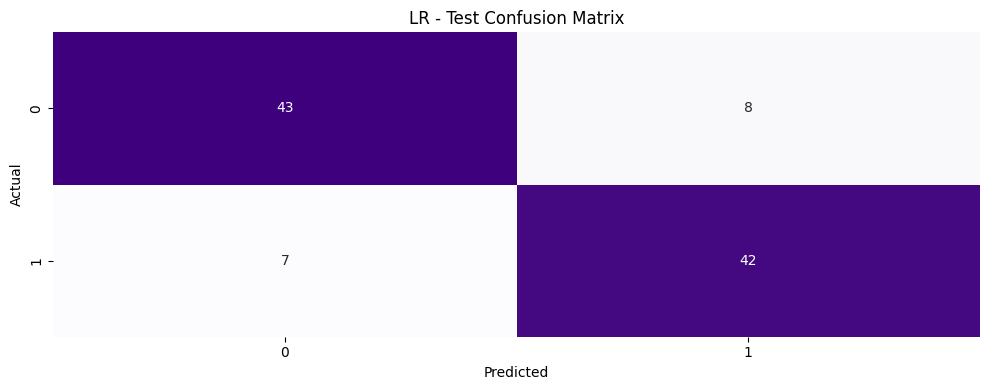

Training DT...
DT - Test Accuracy: 0.7500
DT - Test Precision: 0.7561616161616163
DT - Test Recall: 0.7355555555555556
DT - Test F1-score: 0.7492200197463355
DT - Test AUC-ROC: 0.8529
DT - Test Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.73      0.74        51
           1       0.73      0.76      0.74        49

    accuracy                           0.74       100
   macro avg       0.74      0.74      0.74       100
weighted avg       0.74      0.74      0.74       100




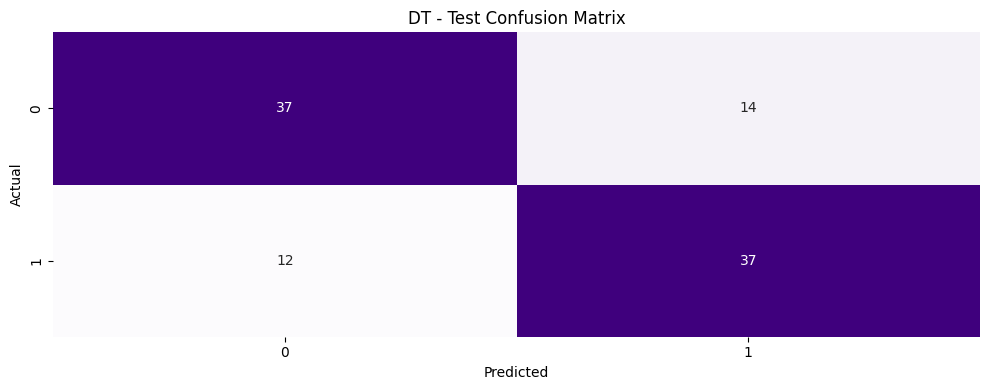

Training RF...
RF - Test Accuracy: 0.8000
RF - Test Precision: 0.8014646464646464
RF - Test Recall: 0.7955555555555556
RF - Test F1-score: 0.7989412926255032
RF - Test AUC-ROC: 0.9198
RF - Test Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.88        51
           1       0.89      0.84      0.86        49

    accuracy                           0.87       100
   macro avg       0.87      0.87      0.87       100
weighted avg       0.87      0.87      0.87       100




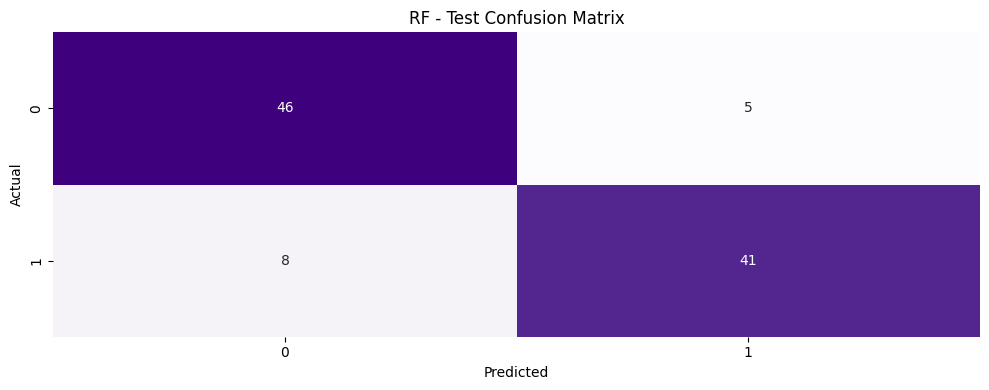

Training GaussainNB...
GaussainNB - Test Accuracy: 0.8200
GaussainNB - Test Precision: 0.8441919191919192
GaussainNB - Test Recall: 0.7955555555555555
GaussainNB - Test F1-score: 0.818022153733555
GaussainNB - Test AUC-ROC: 0.8912
GaussainNB - Test Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85        51
           1       0.84      0.86      0.85        49

    accuracy                           0.85       100
   macro avg       0.85      0.85      0.85       100
weighted avg       0.85      0.85      0.85       100




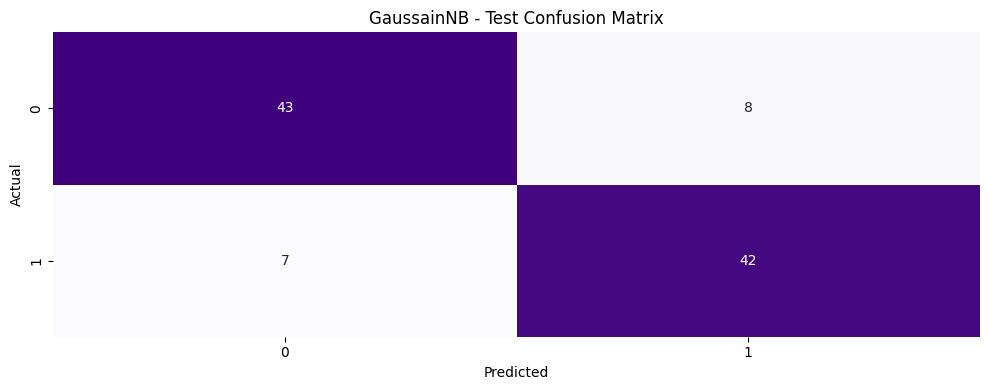

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report


# Perform GridSearchCV for each model
classification_models  = {
    'SVM': SVC(C=1, degree=1, probability=True, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=6, p=1),
    'LR': LogisticRegression(C=0.1, random_state=42),
    'DT': DecisionTreeClassifier(max_depth=5, min_samples_leaf=4, random_state=42),
    'RF': RandomForestClassifier(max_depth=2, min_samples_leaf=2, n_estimators=50, random_state=42),
    'GaussainNB': GaussianNB(var_smoothing=1e-07)
}

classification_results = {}

# Evaluate classification models on the performance metrics
for model_name, model in classification_models.items():
    print(f"Training {model_name}...")
    best_model = model.fit(train_arr, y_train)

    y_train_pred = best_model.predict(train_arr)
    y_test_pred = best_model.predict(test_arr)

    #test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracy = cross_val_score(best_model,test_arr,y_test, cv=5,scoring='accuracy').mean()

#    test_precision = precision_score(y_test, y_test_pred, average='macro')
    test_precision = cross_val_score(best_model,test_arr,y_test, cv=5,scoring='precision').mean()

 #   test_recall = recall_score(y_test, y_test_pred, average='macro')
    test_recall = cross_val_score(best_model,test_arr,y_test, cv=5,scoring='recall').mean()

  #  test_f1 = f1_score(y_test, y_test_pred, average='macro')
    test_f1 = cross_val_score(best_model,test_arr,y_test, cv=5,scoring='f1_macro').mean()

    # Confusion Matrix
    cm_test = confusion_matrix(y_test, y_test_pred)

    # AUC-ROC score for multiclass
    try:
        y_test_prob = best_model.predict_proba(test_arr)[:, 1]    # Probability for class 1
        test_roc_auc = roc_auc_score(y_test, y_test_prob)
    except AttributeError:
        test_roc_auc = None

    # Classification reports
    test_classification_report = classification_report(y_test, y_test_pred)

    # Storing results of each metric
    classification_results[model_name] = {
        "Test Accuracy": test_accuracy,
        "Test Precision": test_precision,
        "Test Recall": test_recall,
        "Test F1-score": test_f1,
        "Test AUC-ROC": test_roc_auc,
        "Test Confusion Matrix": cm_test,
        "Test Classification Report": test_classification_report
    }

    # Print metrics
    print(f"{model_name} - Test Accuracy: {test_accuracy:.4f}")
    print(f"{model_name} - Test Precision: {test_precision}")
    print(f"{model_name} - Test Recall: {test_recall}")
    print(f"{model_name} - Test F1-score: {test_f1}")

    if test_roc_auc is not None:
        print(f"{model_name} - Test AUC-ROC: {test_roc_auc:.4f}")
    else:
        print(f"{model_name} - AUC-ROC scores could not be computed.")

    print(f"{model_name} - Test Classification Report:\n{test_classification_report}")
    print("=" * 50 + "\n")

    # Plotting confusion matrices
    plt.figure(figsize=(10, 4))

    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Purples', cbar=False)
    plt.title(f'{model_name} - Test Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    plt.tight_layout()
    plt.show()



Metrics for Classification Models:
           Test Accuracy Test Precision Test Recall Test F1-score Test AUC-ROC
SVM               0.8100         0.7966      0.8156        0.8094       0.9120
KNN               0.8100         0.8601      0.7356        0.8073       0.8922
LR                0.8100         0.7955      0.8133        0.8087       0.9112
DT                0.7500         0.7562      0.7356        0.7492       0.8529
RF                0.8000         0.8015      0.7956        0.7989       0.9198
GaussainNB        0.8200         0.8442      0.7956        0.8180       0.8912


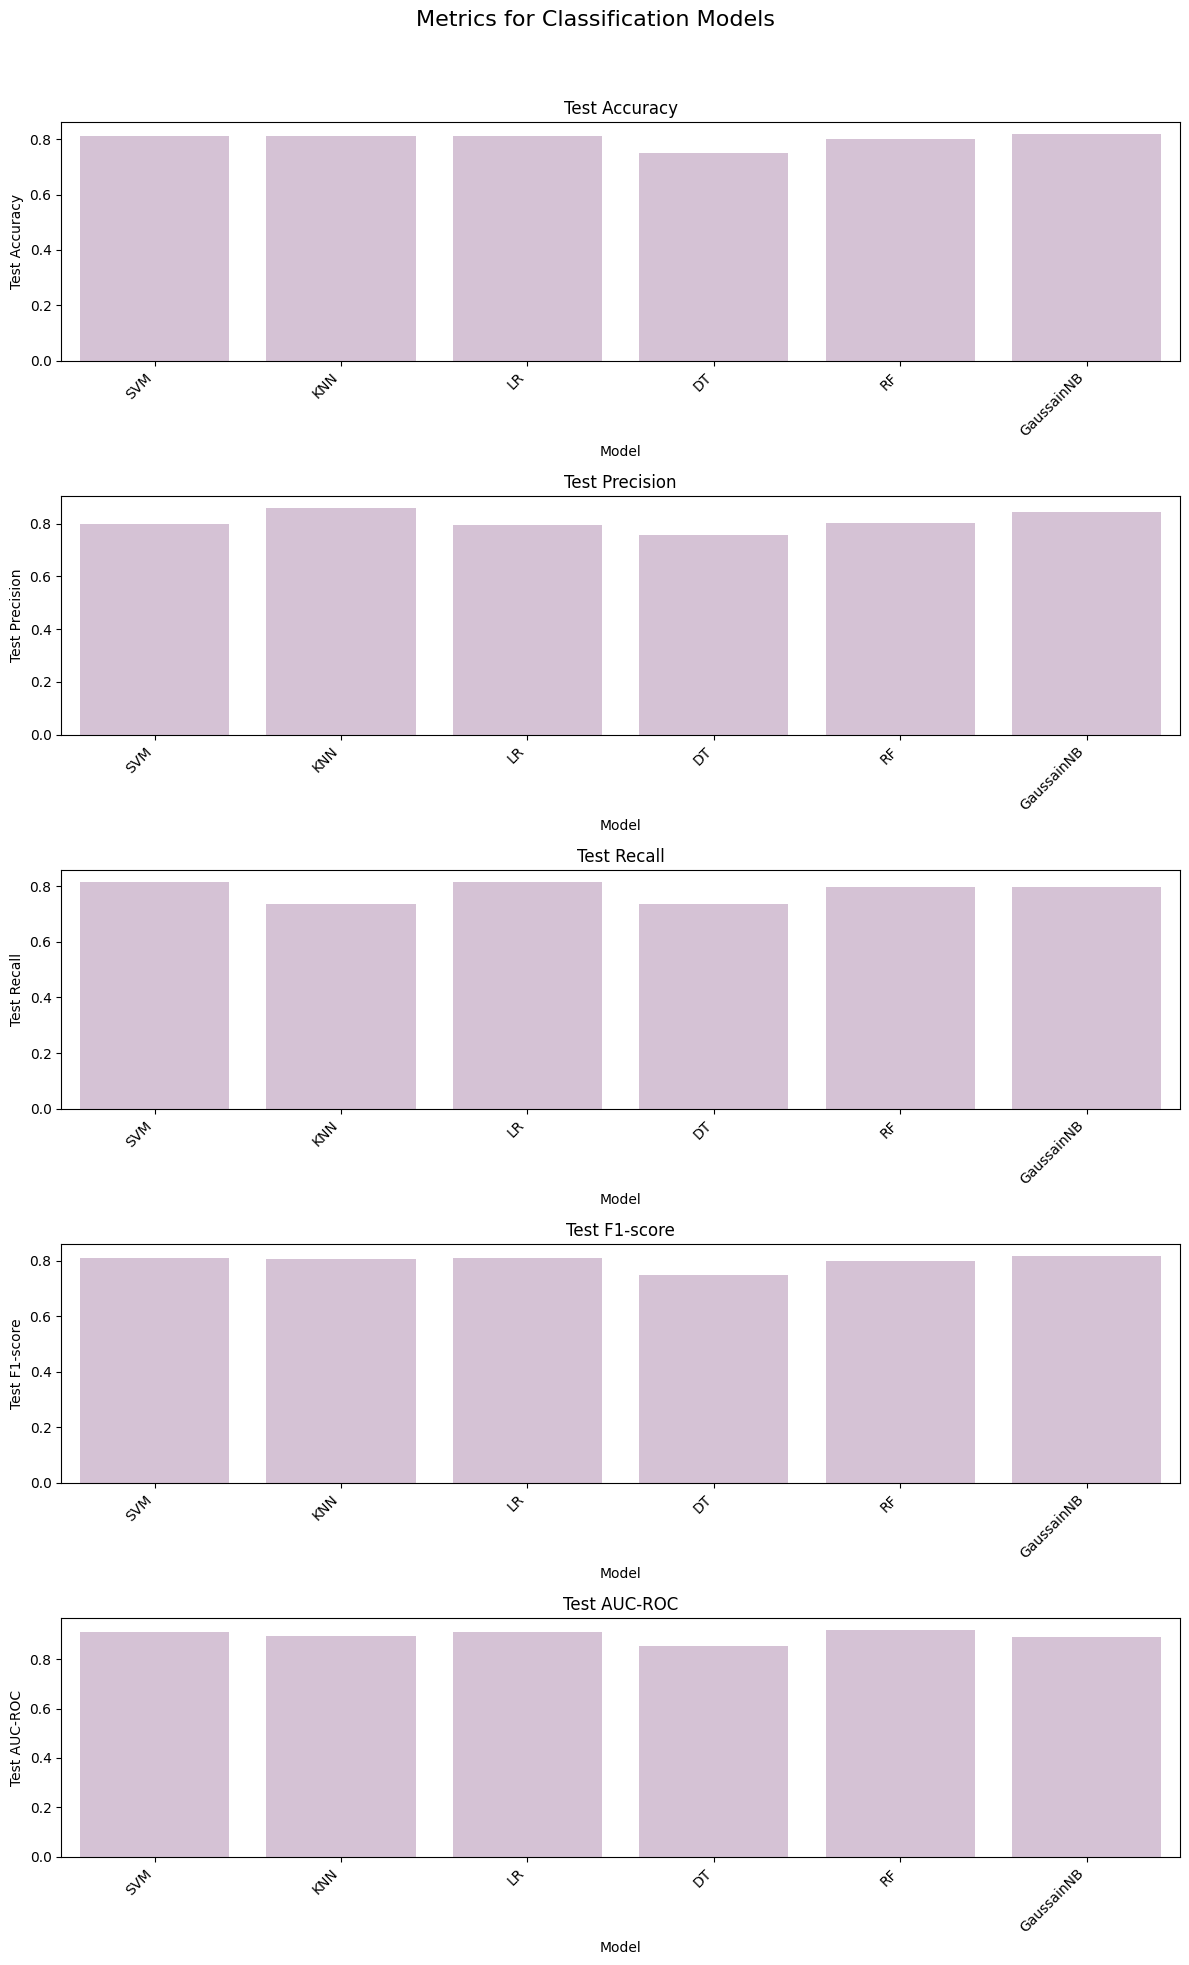

In [32]:
# Convert metrics dictionary to DataFrame
metrics_df = pd.DataFrame(classification_results).T

# Format DataFrame to show only relevant metrics
metrics_df = metrics_df[[
    "Test Accuracy",
    "Test Precision",
    "Test Recall",
    "Test F1-score",
    "Test AUC-ROC",
]]

# Print formatted table
print("\nMetrics for Classification Models:")
print("=" * 100)
print(metrics_df.to_string(float_format="{:.4f}".format))
print("=" * 100)


# Plotting the metrics
fig, axes = plt.subplots(5, 1, figsize=(12, 20))
fig.suptitle('Metrics for Classification Models', fontsize=16)

# Plot each metric
metrics_list = [
    ("Test Accuracy", "Test Accuracy"),
    ("Test Precision", "Test Precision"),
    ("Test Recall", "Test Recall"),
    ("Test F1-score", "Test F1-score"),
    ("Test AUC-ROC", "Test AUC-ROC"),
]

for ax, (metric, title) in zip(axes.flatten(), metrics_list):
    sns.barplot(x=metrics_df.index, y=metrics_df[metric], ax=ax, color='#D8BFD8')
    ax.set_title(title)
    ax.set_xlabel('Model')
    ax.set_ylabel(metric)
    ax.set_xticks(range(len(metrics_df.index)))
    ax.set_xticklabels(metrics_df.index, rotation=45, ha='right')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [33]:
from termcolor import colored

# Ensure relevant columns are numeric
numeric_cols = [
     "Test Accuracy",
     "Test Precision",
     "Test Recall",
     "Test F1-score",
     "Test AUC-ROC"
]
metrics_df[numeric_cols] = metrics_df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Find the best models based on different metrics
best_accuracy_model = metrics_df.loc[metrics_df['Test Accuracy'].idxmax()]
best_precision_model = metrics_df.loc[metrics_df['Test Precision'].idxmax()]
best_recall_model = metrics_df.loc[metrics_df['Test Recall'].idxmax()]
best_f1_model = metrics_df.loc[metrics_df['Test F1-score'].idxmax()]
best_auc_roc_model = metrics_df.loc[metrics_df['Test AUC-ROC'].idxmax()]

# Find the worst models based on different metrics
worst_accuracy_model = metrics_df.loc[metrics_df['Test Accuracy'].idxmin()]
worst_precision_model = metrics_df.loc[metrics_df['Test Precision'].idxmin()]
worst_recall_model = metrics_df.loc[metrics_df['Test Recall'].idxmin()]
worst_f1_model = metrics_df.loc[metrics_df['Test F1-score'].idxmin()]
worst_auc_roc_model = metrics_df.loc[metrics_df['Test AUC-ROC'].idxmin()]


def print_colored(text, color):
    colors = {
        'green': '\033[92m',
        'red': '\033[91m',
        'bold': '\033[1m',
        'end': '\033[0m'
    }
    return f"{colors[color]}{text}{colors['end']}"

# Summary of Best Models
print(print_colored("\nSummary of Best Models:",'bold'))
print(print_colored(f"Best by Accuracy: {best_accuracy_model.name} with {best_accuracy_model['Test Accuracy']:.4f}", 'green'))
print(print_colored(f"Best by Precision: {best_precision_model.name} with {best_precision_model['Test Precision']:.4f}", 'green'))
print(print_colored(f"Best by Recall: {best_recall_model.name} with {best_recall_model['Test Recall']:.4f}", 'green'))
print(print_colored(f"Best by F1-score: {best_f1_model.name} with {best_f1_model['Test F1-score']:.4f}", 'green'))
print(print_colored(f"Best by AUC-ROC: {best_auc_roc_model.name} with {best_auc_roc_model['Test AUC-ROC']:.4f}", 'green'))

print(print_colored("\nSummary of Worst Models:",'bold'))
print(print_colored(f"Worst by Accuracy: {worst_accuracy_model.name} with {worst_accuracy_model['Test Accuracy']:.4f}",'red'))
print(print_colored(f"Worst by Precision: {worst_precision_model.name} with {worst_precision_model['Test Precision']:.4f}","red"))
print(print_colored(f"Worst by Recall: {worst_recall_model.name} with {worst_recall_model['Test Recall']:.4f}", "red"))
print(print_colored(f"Worst by F1-score: {worst_f1_model.name} with {worst_f1_model['Test F1-score']:.4f}", "red"))
print(print_colored(f"Worst by AUC-ROC: {worst_auc_roc_model.name} with {worst_auc_roc_model['Test AUC-ROC']:.4f}","red"))



Summary of Best Models:
Best by Accuracy: GaussainNB with 0.8200
Best by Precision: KNN with 0.8601
Best by Recall: SVM with 0.8156
Best by F1-score: GaussainNB with 0.8180
Best by AUC-ROC: RF with 0.9198

Summary of Worst Models:
Worst by Accuracy: DT with 0.7500
Worst by Precision: DT with 0.7562
Worst by Recall: KNN with 0.7356
Worst by F1-score: DT with 0.7492
Worst by AUC-ROC: DT with 0.8529
